https://oracleselixir.com/

In [1]:
import pandas as pd
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
All_data_2019 = pd.read_csv('2019_team_match_data_from_OraclesElixir.csv')
All_data_2020 = pd.read_csv('all_data_2020.csv')
All_data_2021 = pd.read_csv('2021_team_match_data_from_OraclesElixir.csv')
lpl_summer_21 = pd.read_csv('LPL_SUMMER_21.csv', sep=";")   # Some missing data for the LPL summer 21. Another source was used.

All_data_2019[10:15]


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
10,ESPORTSTMNT01/1030526,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 14:56:22,1,9.01,...,468.0,2579.0,1391.0,22.0,7.0,15.0,4.0,4.0,2.0,7.0
11,ESPORTSTMNT01/1030526,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 14:56:22,1,9.01,...,490.0,-2579.0,-1391.0,-22.0,4.0,2.0,7.0,7.0,15.0,4.0
12,ESPORTSTMNT01/1040501,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 16:06:12,1,9.01,...,146.0,-694.0,-681.0,-25.0,0.0,0.0,0.0,0.0,0.0,0.0
13,ESPORTSTMNT01/1040501,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 16:06:12,1,9.01,...,89.0,987.0,247.0,-4.0,3.0,1.0,0.0,0.0,1.0,0.0
14,ESPORTSTMNT01/1040501,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 16:06:12,1,9.01,...,124.0,916.0,-200.0,8.0,1.0,2.0,1.0,0.0,1.0,3.0


# # Data Transformation

In [3]:
# The following are the parameters from the lists stated before, that we will be using throughout the paper: 

## Team Stat

# Team - Team Name
# GP - Games played
# W  - Games Won
# L  - Games Lost
# AGT (gamelength) - Average Game time duration
# K - Team Kills
# D - Team Deaths
# A - Team Assists
# KD - Kill to death Ratio ( 1.5 KD means 1.5 kills x 1 death)
# TKPM (team kpm)
# CKPM - Average combined kills x minute. Team kills + Opponent kills
# GPR - Gold Percet Rating (measures the avg % of the total gold in the game held by a team througout their games as a way 
                         # to show hou much they play from ahead / behind relative to 50%. ) 
# GSPD- AVG Gold spend % diff.(Measures the AVG margin of victory at the end of the game based on how much gold each team spent)
# EGR - Early Game rating
# MLR - Mid Game Rating
# GD 15 - AVG gold diff at 15
# FB % - AVG first Blood
# FT % - AVG First Tower
# F3T % - % games to destroy 3 towers first. Good Transcision from early game (Normally leads) to mid game. 
# HLD % Herald control rate
# FD % - AVG First Drake
# DRG% - Dragon Control rate ( % of all drakes takel/killed/stolen)
# FBN% - First Baron rate
# BN% - Baron control rate ( Close to 100% = ability to close up games when ahead ( if FBN% is also high). If not = ability to drag out games)
# LNE% - Lane Control: Average share of game's total lane cs.
# JNG% - Average share of game's total jungle cs
# WPM - wards x minute
# CWPM - Control wards per minute
# WCPM - Average wards cleared per minute
 






STEPS TO FOLLOW: 

A) Select Specific SPLITS AND REGIONS. (Split 2) + REGION IN LIST(LCS, LEC, LMS, LPL, LCK, VN) for 2019   

    A.1) Select Specific Teams Within Those Regions. Teams in list (FPX, G2 Esports, SKT, TL, AHQ, FNC, C9, GAM, Griffin, IG, J Team, RNG, Clutch Gaming, Damwon, Hq Attitude, Splyce) 

B) Change columns names so it matches the end and desired result.

    B.1) Select Specific Columns detailed above. 

C) Transformation of specific Columns:

    C.1) Groupby, Sums, Counts, averages to get desired data ( games played, kills...)
  
    C.2) Check data types
   

LIST OF PROBLEMATIC COLUMNS: 

- result ( 1 win, 0 = lose)  Make new columns so that whenever 1 = +win whenever 0 + lost
- gamelength ( its in seconds) All_data_2019['gamelength'] = All_data_2019['gamelength'] / 60 to fix 
- assists - per player. Need to group x team.
- golddiffat15 : per player. Needs to be grouped per team, summed up and make the average of the sum. 
- FB (firstblood)- float types with 1's and 0's.  Grouped x team and COUNT / SUM. Then Divide x Nº of games. 
- FT (firsttower) - A lot of nan Values. float types with 1's and 0's. Same as before
- FD (SAME)
- HLD (SAME) 
- DRG (dragons) Dragon Control rate ( % of all drakes taken/killed/stolen).  To get rate :  Team D / Team D + opp drakes
  Reflecting only elemental drakes.   dragons & opp_dragons  elementaldrakes  & opp_elementaldrakes (check if they are =)
- ELD same as dragons (same calculus) 
- FBN (firstbaron)  - Same as in towers/blood
- WPM (wpm) - groupby team + sum + average.
- CWPM (controlwardsbought) . Need to Divide by the game duration.  Groupby team, sum it up. 
- WCPM (wardskilled) - Need to divide by game duration. Groupby team, Average Sum it up. 


LIST OF ADDITIONAL COLUMNS: 

- KD ( kill to deaths ratio) : ALL_data_2019['KD'] = ALL_data_2019['TK'] / ALL_data_2019['TD'] (AFTER RENAMING)
- GPR  ++
- GSPD - Using data_A[goldspent]  ++
- EGR ++ 
- MLR ++
- BN ( baron control rate) Same calculus as in DRG/ELD
- DRG (dragons) Dragon Control rate ( % of all drakes taken/killed/stolen).  To get rate :  Team D / Team D + opp drakes
  Reflecting only elemental drakes.   dragons & opp_dragons  elementaldrakes  & opp_elementaldrakes (check if they are =)
- ELD same as dragons (same calculus)
- JNG%  *****
- LNE% ******








### A) Data Transformation: Adding new columns

In [4]:
# As detailed in the "STEPS TO FOLLOW" guideline, there is a bunch of parameters yet to appear which requires operations.

# NEW COLUMNS

All_data_2019['DRG'] = All_data_2019['elementaldrakes'] / (All_data_2019['elementaldrakes'] + All_data_2019['opp_elementaldrakes'])

All_data_2019['BN'] = All_data_2019['barons'] / (All_data_2019['barons'] + All_data_2019['opp_barons'])

All_data_2019['ELD'] = All_data_2019['elders'] / (All_data_2019['elders'] + All_data_2019['opp_elders'])





### B) Data Transformation - Selection of Splits and Regions  & Some Column name changes

In [5]:
worlds_regions_19 = ['LEC', 'LMS', 'LPL', 'LCK', 'VN','PCS']  
worlds_teams_19 = ['G2 Esports', 'Fnatic', 'Splyce', 'FunPlus Phoenix', 'ahq eSports Club', 'Cloud9', 'Clutch Gaming',
                'DWG KIA', 'GAM Esports', 'Griffin', 'Hong Kong Attitude', 'Invictus Gaming', 'J Team', 'Royal Never Give Up',
               'SK Telecom T1', 'Team Liquid']

All_data_2019['gamelength'] = All_data_2019['gamelength'] / 60   


pd.options.display.float_format = '{:,.2f}'.format



# We create a new df, by filtering our data using .loc, which will return all rows matching our column criteria. 

data_A = All_data_2019.loc[(All_data_2019['split'] == 'Summer') & (All_data_2019['team'].isin(worlds_teams_19)) & (All_data_2019['playoffs'] == 0)]


# Now we got all the match data from the qualyfing 2019 Worlds teams. Next step (B) will be to select specific columns.


data_A.rename(columns= {'teamkills':'TK', 'teamdeaths':'TD', 'firstblood':'FB','ckpm':'CKPM', 'team kpm':'TKPM',
                                 'golddiffat15':'GD15','firsttower':'FT','firsttothreetowers':'F3T','firstherald':'HLD','firstdragon':'FD'
                                 ,'firstbaron':'FBN', 'gamelength': 'AGT'}, inplace= True)



C:\Users\Guillo\PycharmProjects\Mosh\test\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [6]:
 for col_name in data_A.columns: 
     print(col_name)

gameid
datacompleteness
url
league
year
split
playoffs
date
game
patch
playerid
side
position
player
team
champion
ban1
ban2
ban3
ban4
ban5
AGT
result
kills
deaths
assists
TK
TD
doublekills
triplekills
quadrakills
pentakills
FB
firstbloodkill
firstbloodassist
firstbloodvictim
TKPM
CKPM
FD
dragons
opp_dragons
elementaldrakes
opp_elementaldrakes
infernals
mountains
clouds
oceans
dragons (type unknown)
elders
opp_elders
HLD
heralds
opp_heralds
FBN
barons
opp_barons
FT
towers
opp_towers
firstmidtower
F3T
turretplates
opp_turretplates
inhibitors
opp_inhibitors
damagetochampions
dpm
damageshare
damagetakenperminute
damagemitigatedperminute
wardsplaced
wpm
wardskilled
wcpm
controlwardsbought
visionscore
vspm
totalgold
earnedgold
earned gpm
earnedgoldshare
goldspent
gspd
total cs
minionkills
monsterkills
monsterkillsownjungle
monsterkillsenemyjungle
cspm
goldat10
xpat10
csat10
opp_goldat10
opp_xpat10
opp_csat10
golddiffat10
xpdiffat10
csdiffat10
killsat10
assistsat10
deathsat10
opp_killsat10
o

In [7]:
f_data_A = data_A[data_A['player'].notnull()]



### B.1) Data Transformation: Selecting desired columns:

In [8]:
# Selecting Specific columns

summer_19 = data_A[['gameid','league', 'team','player' ,'AGT', 'result', 'TK', 'TD','TKPM','CKPM', 'FB','FT','F3T','FD', 
                   'DRG', 'ELD', 'HLD', 'FBN','BN']]


# We modify our new table (summer_19) with specific aggregate stadistics operations. The goal is to get a more insightful data.

summer_19 = summer_19.groupby(['team','league']).agg({'gameid':'nunique','player': 'nunique','AGT': 'mean','result': 'sum','TK': 'mean','TD':'mean',
                                          'TKPM': 'mean', 'CKPM': 'mean', 'FB': 'sum', 'FT': 'sum',
                                          'F3T': 'sum', 'FD': 'sum', 'DRG': 'mean', 'ELD': 'mean', 'FBN': 'sum','BN': 'mean', 'HLD': 'sum',
                                         })



summer_19

,,gameid,player,AGT,result,TK,TD,TKPM,CKPM,FB,FT,F3T,FD,DRG,ELD,FBN,BN,HLD
team,league,,,,,,,,,,,,,,,,,
Cloud9,LCS,19,8,32.64,78,14.95,9.74,0.48,0.77,40.00,8.00,10.00,8.00,0.51,0.50,13.00,0.71,11.00
Clutch Gaming,LCS,18,5,33.74,54,10.78,10.39,0.32,0.64,40.00,14.00,14.00,8.00,0.51,0.00,11.00,0.62,12.00
DWG KIA,LCK,44,8,32.95,168,13.25,10.59,0.41,0.72,49.00,21.00,26.00,26.00,0.64,0.40,27.00,0.65,23.00
Fnatic,LEC,18,6,32.43,84,18.17,13.94,0.57,1.00,47.00,10.00,12.00,8.00,0.61,0.67,12.00,0.78,9.00
FunPlus Phoenix,LPL,33,5,30.29,174,19.15,10.48,0.64,0.98,21.00,22.00,22.00,24.00,0.74,nan,28.00,0.86,15.00
G2 Esports,LEC,18,5,26.95,90,20.33,11.89,0.78,1.20,33.00,12.00,15.00,11.00,0.67,nan,9.00,0.69,13.00
GAM Esports,VCS,31,8,32.72,138,18.16,12.03,0.57,0.94,58.00,21.00,22.00,16.00,0.55,0.75,16.00,0.56,19.00
Griffin,LCK,42,6,32.49,174,11.71,6.81,0.37,0.58,94.00,30.00,29.00,23.00,0.59,0.25,26.00,0.69,19.00
Hong Kong Attitude,LMS,29,6,32.71,96,11.55,10.48,0.37,0.69,42.00,13.00,16.00,13.00,0.54,0.33,12.00,0.54,5.00


In [9]:
# Some additional changes to the data needs to be done. There are some inconsistencies in the data. Not all regions 
#plays the same amount of games ( Korea and China best of 3's, LCS, LEC best of 1's)

# Ratio: 6

#JUST ONCE

summer_19['result'] = summer_19['result'] / 6

summer_19['FD'] = summer_19['FD'] / summer_19['gameid']
summer_19['FB'] = summer_19['FB'] / summer_19['gameid']
summer_19['FT'] = summer_19['FT'] / summer_19['gameid']
summer_19['F3T'] = summer_19['F3T'] / summer_19['gameid']
summer_19['HLD'] = summer_19['HLD'] / summer_19['gameid']
summer_19['FBN'] = summer_19['FBN'] / summer_19['gameid']

summer_19['KD'] = summer_19['TK'] / summer_19['TD']

summer_19['WR'] = summer_19['result'] / summer_19['gameid']

summer_19['GD15'] = (f_data_A.groupby(['team','league']).agg({'GD15': 'mean'})) * 5 


summer_19.style.format({'AGT': "{:.2f}", 'TK': "{:.2f}", 'TD': "{:.2f}",'TKPM': "{:.2f}", 'CKPM': "{:.2f}", 'FB': "{:.0%}",
'FT': "{:.0%}", 'F3T': "{:.0%}", 'FD': "{:.0%}", 'DRG': "{:.0%}",'ELD': "{:.0%}", 'FBN': "{:.0%}",'BN': "{:.0%}",
                            'HLD': "{:.0%}", 'KD': "{:.2f}", 'GD15': "{:.2f}", 'WR': '{:.2%}','result': '{:.0f}'})



,,gameid,player,AGT,result,TK,TD,TKPM,CKPM,FB,FT,F3T,FD,DRG,ELD,FBN,BN,HLD,KD,WR,GD15
team,league,,,,,,,,,,,,,,,,,,,,
Cloud9,LCS,19,8,32.64,13,14.95,9.74,0.48,0.77,211%,42%,53%,42%,51%,50%,68%,71%,58%,1.54,68.42%,520.47
Clutch Gaming,LCS,18,5,33.74,9,10.78,10.39,0.32,0.64,222%,78%,78%,44%,51%,0%,61%,62%,67%,1.04,50.00%,756.83
DWG KIA,LCK,44,8,32.95,28,13.25,10.59,0.41,0.72,111%,48%,59%,59%,64%,40%,61%,65%,52%,1.25,63.64%,27.34
Fnatic,LEC,18,6,32.43,14,18.17,13.94,0.57,1.00,261%,56%,67%,44%,61%,67%,67%,78%,50%,1.30,77.78%,805.67
FunPlus Phoenix,LPL,33,5,30.29,29,19.15,10.48,0.64,0.98,64%,67%,67%,73%,74%,nan%,85%,86%,45%,1.83,87.88%,1720.42
G2 Esports,LEC,18,5,26.95,15,20.33,11.89,0.78,1.20,183%,67%,83%,61%,67%,nan%,50%,69%,72%,1.71,83.33%,2606.22
GAM Esports,VCS,31,8,32.72,23,18.16,12.03,0.57,0.94,187%,68%,71%,52%,55%,75%,52%,56%,61%,1.51,74.19%,1510.23
Griffin,LCK,42,6,32.49,29,11.71,6.81,0.37,0.58,224%,71%,69%,55%,59%,25%,62%,69%,45%,1.72,69.05%,1661.50
Hong Kong Attitude,LMS,29,6,32.71,16,11.55,10.48,0.37,0.69,145%,45%,55%,45%,54%,33%,41%,54%,17%,1.10,55.17%,-356.59


In [10]:
All_data_2021['DRG'] = All_data_2021['elementaldrakes'] / (All_data_2021['elementaldrakes'] + All_data_2021['opp_elementaldrakes'])

All_data_2021['BN'] = All_data_2021['barons'] / (All_data_2021['barons'] + All_data_2021['opp_barons'])

All_data_2021['ELD'] = All_data_2021['elders'] / (All_data_2021['elders'] + All_data_2021['opp_elders'])


worlds_regions_21 = ['LEC', 'LMS', 'LPL', 'LCK', 'PCS']  
worlds_teams_21 = ['MAD Lions', 'Fnatic', 'EDward Gaming', 'FunPlus Phoenix', 'Rogue', 'Royal Never Give Up', 'T1',
                'DWG KIA', 'Hanwha Life Esports', 'Gen.G', 'Cloud9', 'LNG Esports','PSG Talon',
               '100 Thieves', 'Team Liquid']


All_data_2021['gamelength'] = All_data_2021['gamelength'] / 60   


pd.options.display.float_format = '{:,.2f}'.format


# We create a new df, by filtering our data using .loc, which will return all rows matching our column criteria. 

data_C = All_data_2021.loc[(All_data_2021['split'] == 'Summer') & (All_data_2021['team'].isin(worlds_teams_21)) & (All_data_2021['playoffs'] == 0)]


# Now we got all the match data from the qualyfing 2019 Worlds teams. Next step (B) will be to select specific columns.


data_C.rename(columns= {'teamkills':'TK', 'teamdeaths':'TD', 'firstblood':'FB','ckpm':'CKPM', 'team kpm':'TKPM',
                                 'golddiffat15':'GD15','firsttower':'FT','firsttothreetowers':'F3T','firstherald':'HLD','firstdragon':'FD'
                                 ,'firstbaron':'FBN', 'gamelength': 'AGT'}, inplace= True)


f_data_C = data_C[data_C['player'].notnull()]




C:\Users\Guillo\PycharmProjects\Mosh\test\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [11]:
# Selecting Specific columns

summer_21 = data_C[['gameid','league', 'team','player' ,'AGT', 'result', 'TK', 'TD','TKPM','CKPM', 'FB','FT','F3T','FD', 
                   'DRG', 'ELD', 'HLD', 'FBN','BN']]


# We modify our new table (summer_20) with specific aggregate stadistics operations. The goal is to get a more insightful data.

summer_21 = summer_21.groupby(['team','league']).agg({'gameid':'nunique','player': 'nunique','AGT': 'mean','result': 'sum','TK': 'mean','TD':'mean',
                                          'TKPM': 'mean', 'CKPM': 'mean', 'FB': 'sum', 'FT': 'sum',
                                          'F3T': 'sum', 'FD': 'sum', 'DRG': 'mean', 'ELD': 'mean', 'FBN': 'sum','BN': 'mean', 'HLD': 'sum',
                                          })


summer_21['result'] = summer_21['result'] / 6

summer_21['FD'] = summer_21['FD'] / summer_21['gameid']
summer_21['FB'] = summer_21['FB'] / summer_21['gameid']
summer_21['FT'] = summer_21['FT'] / summer_21['gameid']
summer_21['F3T'] = summer_21['F3T'] / summer_21['gameid']
summer_21['HLD'] = summer_21['HLD'] / summer_21['gameid']
summer_21['FBN'] = summer_21['FBN'] / summer_21['gameid']

summer_21['KD'] = summer_21['TK'] / summer_21['TD']

summer_21['GD15'] = (f_data_C.groupby(['team', 'league']).agg({'GD15': 'mean'})) * 5 

summer_21['WR'] = summer_21['result'] / summer_21['gameid'] 


summer_21.style.format({'AGT': "{:.2f}",'TK': "{:.2f}", 'TD': "{:.2f}",'TKPM': "{:.2f}", 'CKPM': "{:.2f}", 'FB': "{:.0%}",
'FT': "{:.0%}", 'F3T': "{:.0%}", 'FD': "{:.0%}", 'DRG': "{:.0%}",'ELD': "{:.0%}", 'FBN': "{:.0%}",'BN': "{:.0%}",
                            'HLD': "{:.0%}", 'KD': "{:.2f}", 'GD15': "{:.2f}", 'WR': '{:.1%}'})



,,gameid,player,AGT,result,TK,TD,TKPM,CKPM,FB,FT,F3T,FD,DRG,ELD,FBN,BN,HLD,KD,GD15,WR
team,league,,,,,,,,,,,,,,,,,,,,
100 Thieves,LCS,27,10,31.85,18.000000,13.11,10.22,0.42,0.74,211%,70%,74%,52%,55%,100%,59%,62%,59%,1.28,1081.74,66.7%
Cloud9,LCS,27,6,32.95,15.000000,14.85,10.93,0.46,0.79,270%,37%,44%,48%,56%,50%,52%,60%,37%,1.36,314.15,55.6%
DWG KIA,LCK,43,6,32.53,29.000000,14.12,11.81,0.45,0.80,172%,63%,63%,42%,57%,17%,67%,75%,67%,1.19,336.81,67.4%
EDward Gaming,LPL,35,7,30.27,25.000000,15.63,10.54,0.54,0.88,69%,0%,0%,0%,nan%,nan%,0%,69%,0%,1.48,nan,71.4%
Fnatic,LEC,18,5,31.82,11.000000,17.06,14.83,0.55,1.01,183%,78%,78%,67%,66%,25%,67%,67%,67%,1.15,1675.94,61.1%
FunPlus Phoenix,LPL,39,8,29.72,28.000000,16.08,12.26,0.56,0.97,44%,0%,0%,0%,nan%,nan%,0%,65%,0%,1.31,nan,71.8%
Gen.G,LCK,46,7,33.74,27.000000,13.15,10.65,0.40,0.71,198%,39%,46%,57%,59%,75%,52%,54%,41%,1.23,69.37,58.7%
Hanwha Life Esports,LCK,43,8,33.37,17.000000,11.51,13.00,0.34,0.75,181%,47%,47%,40%,39%,50%,37%,42%,56%,0.89,-136.53,39.5%
LNG Esports,LPL,44,8,32.00,25.000000,13.36,11.02,0.44,0.79,43%,0%,0%,0%,nan%,nan%,0%,49%,0%,1.21,nan,56.8%


In [12]:
# As stated before, there is some missing data for the LPL (Chinese teams). In the summer_21 table we can clearly see how
# There are a bunch of NAN data. We managed to retrieve some of it by making a new CSV file, with data from different sources.

# GD 15 & DRG &  FT & FB 

lpl_summer_21

lpl_comp_21 = lpl_summer_21[['Name','FT','DRA','NASH%','GD15']]


lpl_comp_21.rename(columns= {'Name': 'Team', 'DRA': 'DRG', 'NASH%': 'BN'}, inplace = True)


lpl_comp_21



,Team,FT,DRG,BN,GD15
0,EDward Gaming,54.30,66.00,68.80,3075
1,FunPlus Phoenix,66.70,68.00,65.20,2700
2,LNG Esports,34.10,44.90,48.80,735
3,Royal Never Give Up,74.40,50.20,65.60,1800


Chinese teams stats https://gol.gg/teams/list/season-ALL/split-ALL/tournament-LPL%20Summer%202021/

In [13]:
add_all_data_19 = pd.read_csv('summer_19_data.csv')
add_data_19 = add_all_data_19[['Team','league','GPR', 'GSPD', 'EGR', 'MLR','LNE','JNG']]


worlds_data_19 = pd.read_csv('worlds_main_2019.csv')

worlds_data_19['WR'] = worlds_data_19['W'] /  worlds_data_19['GP']
worlds_data_19['TK'] = worlds_data_19['K'] /  worlds_data_19['GP']
worlds_data_19['TD'] = worlds_data_19['D'] /  worlds_data_19['GP']
worlds_data_19['TKPM'] = worlds_data_19['TK'] / 60      # Once


worlds_data_19 = worlds_data_19[['Team','league','GP','WR','AGT','TK','TD','KD','TKPM','CKPM','GPR','GSPD','EGR','MLR','GD15','FB%', 'FT%',
                               'F3T%', 'HLD%', 'FD%', 'DRG%', 'ELD%', 'FBN%', 'BN%', 'LNE','JNG']]

worlds_data_20 = pd.read_csv('worlds_main_2020.csv')

worlds_data_20['WR'] = worlds_data_20['W'] /  worlds_data_20['GP']
worlds_data_20['TK'] = worlds_data_20['K'] /  worlds_data_20['GP']
worlds_data_20['TD'] = worlds_data_20['D'] /  worlds_data_20['GP']
worlds_data_20['TKPM'] = worlds_data_20['TK'] / 60      # Once

worlds_data_20 = worlds_data_20[['Team','league','GP','WR','AGT','TK','TD','KD','TKPM','CKPM','GPR','GSPD','EGR','MLR','GD15','FB%', 'FT%',
                               'F3T%', 'HLD%', 'FD%', 'DRG%', 'ELD%', 'FBN%', 'BN%', 'LNE','JNG']]

add_all_data_21 = pd.read_csv('All_data_2021.csv')
add_data_21 = add_all_data_21[['Team','league' ,'GPR', 'GSPD', 'EGR', 'MLR', 'LNE','JNG']]

worlds_data_21 = pd.read_csv('worlds_main_2021.csv')

worlds_data_21['WR'] = worlds_data_21['W'] /  worlds_data_21['GP']
worlds_data_21['TK'] = worlds_data_21['K'] /  worlds_data_21['GP']
worlds_data_21['TD'] = worlds_data_21['D'] /  worlds_data_21['GP']
worlds_data_21['TKPM'] = worlds_data_21['TK'] / 60      # Once



#add_data_19 = add_data_19.set_index('Team')

#add_data_19
#worlds_data_19
worlds_data_20
#worlds_data_21

,Team,league,GP,WR,AGT,TK,TD,KD,TKPM,CKPM,...,FT%,F3T%,HLD%,FD%,DRG%,ELD%,FBN%,BN%,LNE,JNG
0,DRX,LCK,9,0.44,33.10,11.44,9.89,1.16,0.19,0.64,...,67%,44%,56%,22%,47%,0%,33%,25%,50.9%,52.8%
1,DWG KIA,LCK,17,0.82,31.20,16.65,9.76,1.70,0.28,0.84,...,82%,88%,79%,82%,75%,50%,71%,76%,50.4%,53.8%
2,FlyQuest,LCS,6,0.50,31.90,12.00,13.33,0.90,0.20,0.79,...,50%,50%,42%,67%,52%,NaN,50%,63%,49.0%,49.2%
3,Fnatic,LEC,11,0.55,29.60,11.91,10.00,1.19,0.20,0.74,...,64%,64%,33%,55%,56%,100%,36%,55%,50.1%,51.0%
4,G2 Esports,LEC,14,0.57,31.90,16.29,14.93,1.09,0.27,0.97,...,50%,29%,44%,29%,45%,100%,43%,40%,50.2%,53.6%
5,Gen.G,LCK,9,0.56,32.10,13.11,16.22,0.81,0.22,0.91,...,56%,56%,72%,56%,53%,NaN,67%,73%,50.8%,46.2%
6,JD Gaming,LPL,10,0.50,29.90,13.70,14.90,0.92,0.23,0.95,...,40%,50%,58%,50%,39%,0%,40%,55%,50.5%,51.4%
7,LGD Gaming,LPL,6,0.50,36.20,14.00,14.17,0.99,0.23,0.78,...,33%,50%,33%,67%,48%,NaN,17%,33%,49.4%,49.9%
8,Machi Esports,PCS,6,0.17,32.80,9.00,17.17,0.52,0.15,0.79,...,33%,33%,42%,67%,48%,NaN,17%,38%,49.2%,39.5%
9,PSG Talon,PCS,6,0.33,27.80,6.33,11.17,0.57,0.11,0.63,...,17%,33%,27%,50%,50%,NaN,33%,40%,49.9%,43.2%


In [14]:
## 2019

all_summer_19 = summer_19.merge(add_data_19, how='left', left_on ='team', right_on = 'Team')

all_summer_19 = all_summer_19[['Team','league','gameid','WR','AGT','TK','TD','KD','TKPM','CKPM','GPR','GSPD','EGR','MLR','GD15','FB',
       'FT', 'F3T', 'FD', 'DRG', 'ELD', 'FBN', 'BN', 'HLD', 'LNE', 'JNG']]


# 2020

all_summer_20 = All_data_2020[['Team','league','GP','AGT','KD','CKPM','GPR','GSPD','EGR','MLR','GD15','FB%','FT%','F3T%','HLD%', 'FD%',
       'DRG%', 'ELD%', 'FBN%', 'BN%','LNE','JNG']]



all_summer_20['WR'] = All_data_2020['W'] /  All_data_2020['GP']
all_summer_20['TK'] = All_data_2020['K'] /  All_data_2020['GP']
all_summer_20['TD'] = All_data_2020['D'] /  All_data_2020['GP']
all_summer_20['TKPM'] = all_summer_20['TK'] / 60      # Once


all_summer_20 = all_summer_20[['Team','league','GP','WR','AGT','TK','TD','KD','TKPM','CKPM','GPR','GSPD','EGR','MLR','GD15','FB%', 'FT%',
                               'F3T%', 'HLD%', 'FD%', 'DRG%', 'ELD%', 'FBN%', 'BN%', 'LNE','JNG']]

       

## 2021

A_summer_21 = summer_21.merge(add_data_21, how='left', left_on ='team', right_on ='Team')

A_summer_21['GD15'] = A_summer_21['GD15'].fillna(0)

A_summer_21.loc[A_summer_21['Team'] == 'EDward Gaming', 'GD15'] = 3075
A_summer_21.loc[A_summer_21['Team'] == 'EDward Gaming', 'FT'] = 0.543
A_summer_21.loc[A_summer_21['Team'] == 'EDward Gaming', 'DRG'] = 0.66

A_summer_21.loc[A_summer_21['Team'] == 'FunPlus Phoenix', 'GD15'] = 2700
A_summer_21.loc[A_summer_21['Team'] == 'FunPlus Phoenix', 'FT'] = 0.667
A_summer_21.loc[A_summer_21['Team'] == 'FunPlus Phoenix', 'DRG'] = 0.68

A_summer_21.loc[A_summer_21['Team'] == 'LNG Esports', 'GD15'] = 735
A_summer_21.loc[A_summer_21['Team'] == 'LNG Esports', 'FT'] = 0.341
A_summer_21.loc[A_summer_21['Team'] == 'LNG Esports', 'DRG'] = 0.449

A_summer_21.loc[A_summer_21['Team'] == 'Royal Never Give Up', 'GD15'] = 1800
A_summer_21.loc[A_summer_21['Team'] == 'Royal Never Give Up', 'FT'] = 0.744
A_summer_21.loc[A_summer_21['Team'] == 'Royal Never Give Up', 'DRG'] = 0.502

all_summer_21 = A_summer_21[['Team','league','gameid','WR','AGT','TK','TD','KD','TKPM','GPR','GSPD','EGR','MLR','GD15','FB',
       'FT', 'F3T', 'FD', 'DRG', 'ELD', 'FBN', 'BN', 'HLD','LNE','JNG']]


all_summer_19['GSPD'] = all_summer_19['GSPD'].str.rstrip('%').astype('float')
all_summer_19['LNE'] = all_summer_19['LNE'].str.rstrip('%').astype('float')
all_summer_19['JNG'] = all_summer_19['JNG'].str.rstrip('%').astype('float')

worlds_data_19['FT%'] = worlds_data_19['FT%'].str.rstrip('%').astype('float')
worlds_data_19['FD%'] = worlds_data_19['FD%'].str.rstrip('%').astype('float')
worlds_data_19['F3T%'] = worlds_data_19['F3T%'].str.rstrip('%').astype('float')
worlds_data_19['HLD%'] = worlds_data_19['HLD%'].str.rstrip('%').astype('float')
worlds_data_19['GSPD'] = worlds_data_19['GSPD'].str.rstrip('%').astype('float')
worlds_data_19['LNE'] = worlds_data_19['LNE'].str.rstrip('%').astype('float')
worlds_data_19['JNG'] = worlds_data_19['JNG'].str.rstrip('%').astype('float')


all_summer_20['FT%'] = all_summer_20['FT%'].str.rstrip('%').astype('float')
all_summer_20['FD%'] = all_summer_20['FD%'].str.rstrip('%').astype('float')
all_summer_20['F3T%'] = all_summer_20['F3T%'].str.rstrip('%').astype('float')
all_summer_20['HLD%'] = all_summer_20['HLD%'].str.rstrip('%').astype('float')
all_summer_20['GSPD'] = all_summer_20['GSPD'].str.rstrip('%').astype('float')
all_summer_20['LNE'] = all_summer_20['LNE'].str.rstrip('%').astype('float')
all_summer_20['JNG'] = all_summer_20['JNG'].str.rstrip('%').astype('float')

worlds_data_20['FT%'] = worlds_data_20['FT%'].str.rstrip('%').astype('float')
worlds_data_20['FD%'] = worlds_data_20['FD%'].str.rstrip('%').astype('float')
worlds_data_20['F3T%'] = worlds_data_20['F3T%'].str.rstrip('%').astype('float')
worlds_data_20['HLD%'] = worlds_data_20['HLD%'].str.rstrip('%').astype('float')
worlds_data_20['GSPD'] = worlds_data_20['GSPD'].str.rstrip('%').astype('float')
worlds_data_20['LNE'] = worlds_data_20['LNE'].str.rstrip('%').astype('float')
worlds_data_20['JNG'] = worlds_data_20['JNG'].str.rstrip('%').astype('float')
worlds_data_20['FBN'] = worlds_data_21['FBN'].str.rstrip('%').astype('float')


all_summer_21['GSPD'] = all_summer_21['GSPD'].str.rstrip('%').astype('float')
all_summer_21['LNE'] = all_summer_21['LNE'].str.rstrip('%').astype('float')
all_summer_21['JNG'] = all_summer_21['JNG'].str.rstrip('%').astype('float')


worlds_data_21['FT'] = worlds_data_21['FT'].str.rstrip('%').astype('float')
worlds_data_21['FD'] = worlds_data_21['FD'].str.rstrip('%').astype('float')
worlds_data_21['F3T'] = worlds_data_21['F3T'].str.rstrip('%').astype('float')
worlds_data_21['HLD'] = worlds_data_21['HLD'].str.rstrip('%').astype('float')
worlds_data_21['GSPD'] = worlds_data_21['GSPD'].str.rstrip('%').astype('float')
worlds_data_21['LNE'] = worlds_data_21['LNE'].str.rstrip('%').astype('float')
worlds_data_21['JNG'] = worlds_data_21['JNG'].str.rstrip('%').astype('float')
worlds_data_21['FBN'] = worlds_data_21['FBN'].str.rstrip('%').astype('float')


#df['col'] = df['col'].str.rstrip('%').astype('float')

##df.loc[df['column'] == 'column_value', 'column'] = 'new_column_value'


#all_summer_19
#all_summer_20
all_summer_21







<ipython-input-14-cc6882fffd52>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_summer_20['WR'] = All_data_2020['W'] /  All_data_2020['GP']
<ipython-input-14-cc6882fffd52>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_summer_20['TK'] = All_data_2020['K'] /  All_data_2020['GP']
<ipython-input-14-cc6882fffd52>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,Team,league,gameid,WR,AGT,TK,TD,KD,TKPM,GPR,...,FT,F3T,FD,DRG,ELD,FBN,BN,HLD,LNE,JNG
0,100 Thieves,LCS,27,0.67,31.85,13.11,10.22,1.28,0.42,0.96,...,0.70,0.74,0.52,0.55,1.00,0.59,0.62,0.59,50.40,52.50
1,Cloud9,LCS,27,0.56,32.95,14.85,10.93,1.36,0.46,0.36,...,0.37,0.44,0.48,0.56,0.50,0.52,0.60,0.37,51.40,54.10
2,DWG KIA,LCK,43,0.67,32.53,14.12,11.81,1.19,0.45,0.39,...,0.63,0.63,0.42,0.57,0.17,0.67,0.75,0.67,49.20,53.20
3,EDward Gaming,LPL,35,0.71,30.27,15.63,10.54,1.48,0.54,nan,...,0.54,0.00,0.00,0.66,nan,0.00,0.69,0.00,50.20,52.30
4,Fnatic,LEC,18,0.61,31.82,17.06,14.83,1.15,0.55,1.24,...,0.78,0.78,0.67,0.66,0.25,0.67,0.67,0.67,49.60,55.20
5,FunPlus Phoenix,LPL,39,0.72,29.72,16.08,12.26,1.31,0.56,nan,...,0.67,0.00,0.00,0.68,nan,0.00,0.65,0.00,49.40,53.90
6,Gen.G,LCK,46,0.59,33.74,13.15,10.65,1.23,0.40,-0.06,...,0.39,0.46,0.57,0.59,0.75,0.52,0.54,0.41,50.70,50.40
7,Hanwha Life Esports,LCK,43,0.40,33.37,11.51,13.00,0.89,0.34,0.12,...,0.47,0.47,0.40,0.39,0.50,0.37,0.42,0.56,50.60,48.60
8,LNG Esports,LPL,44,0.57,32.00,13.36,11.02,1.21,0.44,nan,...,0.34,0.00,0.00,0.45,nan,0.00,0.49,0.00,49.60,51.00
9,MAD Lions,LEC,18,0.67,33.47,15.44,14.17,1.09,0.47,0.33,...,0.50,0.61,0.56,0.58,0.25,0.67,0.74,0.44,49.70,53.30


### VISUALIZATION PROCESS

In [15]:
# AVG GAME TIME (X)  CKPM / TKPM             REGION AND TEAMS

# GPR GSPD            REGION AND TEAMS

#  KD - GD15          REGION AND TEAMS

# Evolution on metrics :  AGT - OBJECTIVES - TK/TD 

# EGR    GD15

all_summer_19['FT&F3T'] = (all_summer_19['FT'] + all_summer_19['F3T']) / 2

worlds_data_19['FT&F3T'] = (worlds_data_19['FT%'] + worlds_data_19['F3T%']) / 2

all_summer_20['FT&F3T'] = (all_summer_20['FT%'] + all_summer_20['F3T%']) / 2

worlds_data_20['FT&F3T'] = (worlds_data_20['FT%'] + worlds_data_20['F3T%']) / 2

all_summer_21['FT&F3T'] = (all_summer_21['FT'] + all_summer_21['F3T']) / 2

worlds_data_21['FT&F3T'] = (worlds_data_21['FT'] + worlds_data_21['F3T']) / 2



<ipython-input-15-2ea44deea560>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_summer_21['FT&F3T'] = (all_summer_21['FT'] + all_summer_21['F3T']) / 2


In [16]:

all_summer_19.columns
#all_summer_20
#all_summer_21

Index(['Team', 'league', 'gameid', 'WR', 'AGT', 'TK', 'TD', 'KD', 'TKPM',
       'CKPM', 'GPR', 'GSPD', 'EGR', 'MLR', 'GD15', 'FB', 'FT', 'F3T', 'FD',
       'DRG', 'ELD', 'FBN', 'BN', 'HLD', 'LNE', 'JNG', 'FT&F3T'],
      dtype='object')

### 2019 SUMMARY

In [17]:
# Early game hs become one of the main factors in modern league of legends. Faster paced games started being the META in 2018 
# when chinese team IG won the Worlds Championship. Control teams ( LCK majorly) were not able to withstand the early leads. 

# First part of the summary will study which teams were more effective in the early game in their region competitions. 
# Then we will compare their data with their results in WORLDS. 




### Summer 19 Visualizations: 

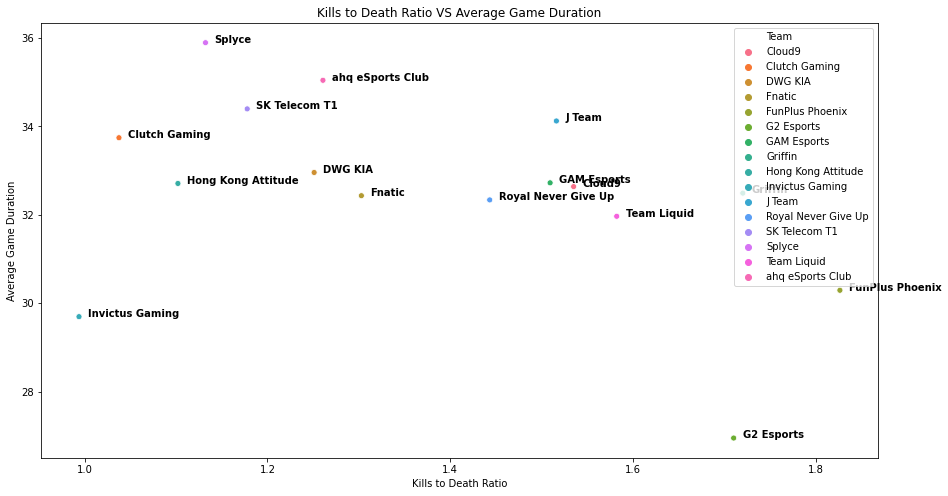

In [18]:

# 1) AVG GAME TIME (X)  CKPM / TKPM             REGION AND TEAMS

# teams = all_summer_19['Team']
# region = all_summer_19['league']


plt.figure(figsize = (15,8)) 

g1 = sns.scatterplot(data =all_summer_19, x= all_summer_19['KD'], y= all_summer_19['AGT'], hue = 'Team')

plt.title('Kills to Death Ratio VS Average Game Duration')
# Set x-axis label
plt.xlabel('Kills to Death Ratio')
# Set y-axis label
plt.ylabel('Average Game Duration')

for line in range(0,all_summer_19.shape[0]):
     g1.text(all_summer_19.KD[line]+0.01,all_summer_19.AGT[line], 
     all_summer_19.Team[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')



# plt.figure(figsize = (15,8)) 
# g2 = sns.scatterplot(data =all_summer_19, x= all_summer_19['TKPM'], y= all_summer_19['AGT'], hue = 'Team')

# plt.title('Team Kills Per Minute VS Average Game Duration')
# # Set x-axis label
# plt.xlabel('Team Kills Per Minute')
# # Set y-axis label
# plt.ylabel('Average Game Duration')

# for line in range(0,all_summer_19.shape[0]):
#      g2.text(all_summer_19.TKPM[line]+0.01,all_summer_19.AGT[line], 
#      all_summer_19.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')

# plt.figure(figsize = (15,8)) 
# g3 = sns.scatterplot(data =all_summer_19, x= all_summer_19['GD15'], y= all_summer_19['AGT'], hue = 'Team')

# plt.title('GD15 VS Average Game Duration')
# # Set x-axis label
# plt.xlabel('Gold Difference / Lead At 15')
# # Set y-axis label
# plt.ylabel('Average Game Duration')

# for line in range(0,all_summer_19.shape[0]):
#      g3.text(all_summer_19.GD15[line]+0.01,all_summer_19.AGT[line], 
#      all_summer_19.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')



# plt.figure(figsize = (15,8)) 

# g4 = sns.scatterplot(data =all_summer_19, x= all_summer_19['GPR'], y= all_summer_19['GSPD'], hue = 'Team')

# plt.title('GPR vs GSPD')
# # Set x-axis label
# plt.xlabel('Gold Percent Rating')
# # Set y-axis label
# plt.ylabel('Average gold spent percentage difference')

# for line in range(0,all_summer_19.shape[0]):
#      g4.text(all_summer_19.GPR[line]+0.01,all_summer_19.GSPD[line], 
#      all_summer_19.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')


# plt.figure(figsize = (15,8)) 
# g5 = sns.scatterplot(data =all_summer_19, x= all_summer_19['GD15'], y= all_summer_19['WR'], hue = 'Team')

# plt.title('GD15 VS Win Rate')
# # Set x-axis label
# plt.xlabel('Gold Difference / Lead At 15')
# # Set y-axis label
# plt.ylabel('Win Rate')

# for line in range(0,all_summer_19.shape[0]):
#      g5.text(all_summer_19.GD15[line]+0.01,all_summer_19.WR[line], 
#      all_summer_19.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')

# plt.figure(figsize = (15,8)) 
# g6 = sns.scatterplot(data =all_summer_19, x= all_summer_19['LNE'], y= all_summer_19['JNG'], hue = 'Team')

# plt.title('Lane Control and Jungle Control')
# # Set x-axis label
# plt.xlabel('Lane Control (CS / Gold Diff in lanes)')
# # Set y-axis label
# plt.ylabel('Jungle CS ')

# plt.grid()

# for line in range(0,all_summer_19.shape[0]):
#      g6.text(all_summer_19.LNE[line]+0.01,all_summer_19.JNG[line], 
#      all_summer_19.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')





In [19]:
#all_summer_19.sort_values('AGT')
#all_summer_19.sort_values('GD15', ascending = False)
#all_summer_19.sort_values('DRG', ascending = False)
#all_summer_19.sort_values('FT&F3T', ascending = False)


## Worlds 2019 Visualizations:

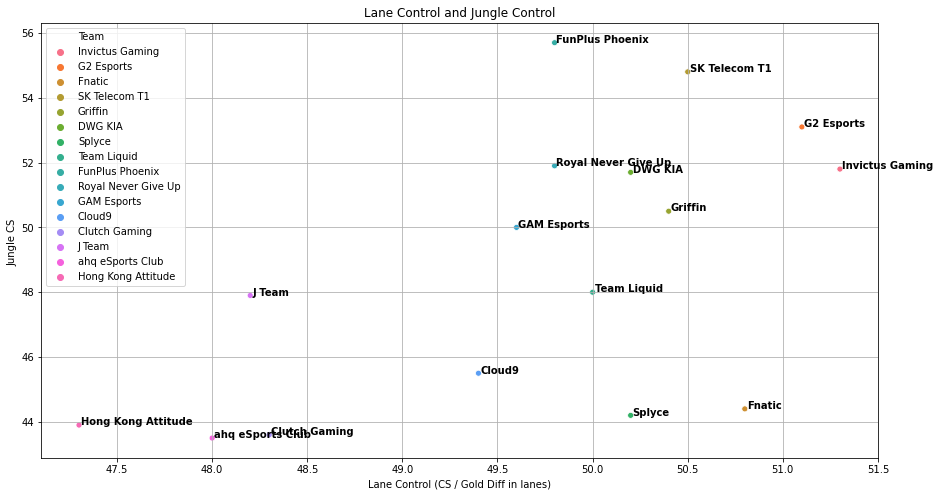

In [20]:
# plt.figure(figsize = (15,8)) 

# g1 = sns.scatterplot(data =worlds_data_19, x= worlds_data_19['KD'], y= worlds_data_19['AGT'], hue = 'Team')

# plt.title('Kills to Death Ratio VS Average Game Duration')
# # Set x-axis label
# plt.xlabel('Kills to Death Ratio')
# # Set y-axis label
# plt.ylabel('Average Game Duration')

# plt.grid()

# for line in range(0,worlds_data_19.shape[0]):
#      g1.text(worlds_data_19.KD[line]+0.01,worlds_data_19.AGT[line], 
#      worlds_data_19.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')



# plt.figure(figsize = (15,8)) 
# g2 = sns.scatterplot(data =worlds_data_19, x= worlds_data_19['TKPM'], y= worlds_data_19['AGT'], hue = 'Team')

# plt.title('Team Kills Per Minute VS Average Game Duration')
# # Set x-axis label
# plt.xlabel('Team Kills Per Minute')
# # Set y-axis label
# plt.ylabel('Average Game Duration')
# plt.grid()

# for line in range(0,worlds_data_19.shape[0]):
#      g2.text(worlds_data_19.TKPM[line]+0.01,worlds_data_19.AGT[line], 
#      worlds_data_19.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')
        

# plt.figure(figsize = (15,8)) 

# g4 = sns.scatterplot(data =worlds_data_19, x= worlds_data_19['GPR'], y= worlds_data_19['GSPD'], hue = 'Team')

# plt.title('GPR vs GSPD')
# # Set x-axis label
# plt.xlabel('Gold Percent Rating')
# # Set y-axis label
# plt.ylabel('Average gold spent percentage difference')
# plt.grid()

# for line in range(0,worlds_data_19.shape[0]):
#      g4.text(worlds_data_19.GPR[line]+0.01,worlds_data_19.GSPD[line], 
#      worlds_data_19.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')


# plt.figure(figsize = (15,8)) 
# g5 = sns.scatterplot(data =worlds_data_19, x= worlds_data_19['GD15'], y= worlds_data_19['WR'], hue = 'Team')

# plt.title('GD15 VS Win Rate')
# # Set x-axis label
# plt.xlabel('Gold Difference / Lead At 15')
# # Set y-axis label
# plt.ylabel('Win Rate')
# plt.grid()

# for line in range(0,worlds_data_19.shape[0]):
#      g5.text(worlds_data_19.GD15[line]+0.01,worlds_data_19.WR[line], 
#      worlds_data_19.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')

plt.figure(figsize = (15,8)) 
g6 = sns.scatterplot(data =worlds_data_19, x= worlds_data_19['LNE'], y= worlds_data_19['JNG'], hue = 'Team')

plt.title('Lane Control and Jungle Control')
# Set x-axis label
plt.xlabel('Lane Control (CS / Gold Diff in lanes)')
# Set y-axis label
plt.ylabel('Jungle CS ')

plt.grid()

for line in range(0,worlds_data_19.shape[0]):
     g6.text(worlds_data_19.LNE[line]+0.01,worlds_data_19.JNG[line], 
     worlds_data_19.Team[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')


In [21]:
# worlds_data_19.sort_values('TKPM', ascending = False)
#worlds_data_19.sort_values('GD15', ascending = False)
#worlds_data_19.sort_values('EGR', ascending = False)
#worlds_data_19.sort_values('FT&F3T', ascending = False)
#worlds_data_19.sort_values('FD&HLD', ascending = False)

### SUMMER 2020 VISUALIZATION

In [22]:
all_summer_20

,Team,league,GP,WR,AGT,TK,TD,KD,TKPM,CKPM,...,F3T%,HLD%,FD%,DRG%,ELD%,FBN%,BN%,LNE,JNG,FT&F3T
0,Suning,LPL,42,0.60,33.10,13.10,11.88,1.10,0.22,0.75,...,62.00,54.00,40.00,49%,29%,61%,66%,50.20,52.70,57.00
1,JD Gaming,LPL,39,0.72,31.60,15.46,10.69,1.45,0.26,0.83,...,56.00,44.00,56.00,56%,33%,68%,68%,50.50,53.70,51.00
2,Top Esports,LPL,37,0.73,32.00,16.27,11.73,1.39,0.27,0.87,...,57.00,58.00,57.00,52%,100%,65%,65%,51.40,52.60,56.50
3,LGD Gaming,LPL,40,0.55,33.50,12.55,11.50,1.09,0.21,0.72,...,45.00,43.00,38.00,52%,60%,58%,56%,49.60,50.80,51.50
4,Fnatic,LEC,18,0.50,32.90,12.33,14.56,0.85,0.21,0.82,...,33.00,40.00,33.00,46%,80%,33%,46%,50.60,51.70,36.00
5,G2 Esports,LEC,18,0.61,31.70,14.11,13.00,1.09,0.24,0.85,...,50.00,58.00,61.00,53%,0%,39%,45%,50.50,54.40,50.00
6,Rogue,LEC,18,0.72,34.50,13.44,7.17,1.88,0.22,0.60,...,89.00,59.00,50.00,58%,50%,61%,71%,49.50,52.80,80.50
7,DRX,LCK,45,0.71,32.50,13.71,10.91,1.26,0.23,0.76,...,64.00,46.00,38.00,52%,50%,60%,69%,51.30,55.00,55.50
8,DWG KIA,LCK,39,0.87,28.00,16.64,7.56,2.20,0.28,0.86,...,95.00,77.00,38.00,60%,50%,67%,88%,50.50,59.40,92.50
9,Gen.G,LCK,43,0.72,31.40,15.16,9.49,1.60,0.25,0.78,...,74.00,72.00,63.00,69%,80%,58%,64%,51.10,52.60,74.00


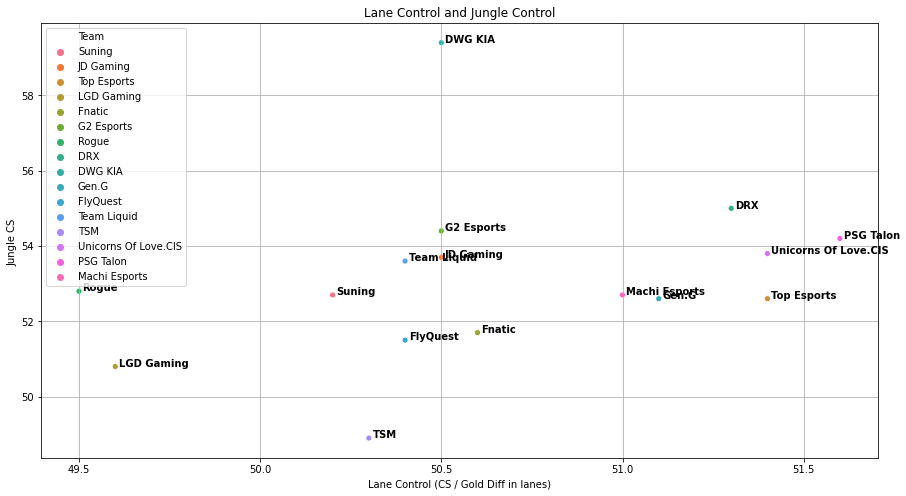

In [23]:
# plt.figure(figsize = (15,8)) 

# g1 = sns.scatterplot(data =all_summer_20, x= all_summer_20['KD'], y= all_summer_20['AGT'], hue = 'Team')

# plt.title('Kills to Death Ratio VS Average Game Duration')
# # Set x-axis label
# plt.xlabel('Kills to Death Ratio')
# # Set y-axis label
# plt.ylabel('Average Game Duration')

# plt.grid()

# for line in range(0,all_summer_20.shape[0]):
#      g1.text(all_summer_20.KD[line]+0.01,all_summer_20.AGT[line], 
#      all_summer_20.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')



# plt.figure(figsize = (15,8)) 
# g2 = sns.scatterplot(data =all_summer_20, x= all_summer_20['TKPM'], y= all_summer_20['AGT'], hue = 'Team')

# plt.title('Team Kills Per Minute VS Average Game Duration')
# # Set x-axis label
# plt.xlabel('Team Kills Per Minute')
# # Set y-axis label
# plt.ylabel('Average Game Duration')
# plt.grid()

# for line in range(0,all_summer_20.shape[0]):
#      g2.text(all_summer_20.TKPM[line]+0.01,all_summer_20.AGT[line], 
#      all_summer_20.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')
        

# plt.figure(figsize = (15,8)) 

# g4 = sns.scatterplot(data =all_summer_20, x= all_summer_20['GPR'], y= all_summer_20['GSPD'], hue = 'Team')

# plt.title('GPR vs GSPD')
# # Set x-axis label
# plt.xlabel('Gold Percent Rating')
# # Set y-axis label
# plt.ylabel('Average gold spent percentage difference')
# plt.grid()

# for line in range(0,all_summer_20.shape[0]):
#      g4.text(all_summer_20.GPR[line]+0.01,all_summer_20.GSPD[line], 
#      all_summer_20.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')


# plt.figure(figsize = (15,8)) 
# g5 = sns.scatterplot(data =all_summer_20, x= all_summer_20['GD15'], y= all_summer_20['WR'], hue = 'Team')

# plt.title('GD15 VS Win Rate')
# # Set x-axis label
# plt.xlabel('Gold Difference / Lead At 15')
# # Set y-axis label
# plt.ylabel('Win Rate')
# plt.grid()

# for line in range(0,all_summer_20.shape[0]):
#      g5.text(all_summer_20.GD15[line]+0.01,all_summer_20.WR[line], 
#      all_summer_20.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')

plt.figure(figsize = (15,8)) 
g6 = sns.scatterplot(data =all_summer_20, x= all_summer_20['LNE'], y= all_summer_20['JNG'], hue = 'Team')

plt.title('Lane Control and Jungle Control')
# Set x-axis label
plt.xlabel('Lane Control (CS / Gold Diff in lanes)')
# Set y-axis label
plt.ylabel('Jungle CS ')

plt.grid()

for line in range(0,all_summer_20.shape[0]):
     g6.text(all_summer_20.LNE[line]+0.01,all_summer_20.JNG[line], 
     all_summer_20.Team[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

In [24]:
#all_summer_20.sort_values('TKPM', ascending = False)
all_summer_20.sort_values('HLD%', ascending = False)
#all_summer_20.sort_values('EGR', ascending = False)
#all_summer_20.sort_values('FT&F3T', ascending = False)
#all_summer_20.sort_values('FD&HLD', ascending = False)

,Team,league,GP,WR,AGT,TK,TD,KD,TKPM,CKPM,...,F3T%,HLD%,FD%,DRG%,ELD%,FBN%,BN%,LNE,JNG,FT&F3T
13,Unicorns Of Love.CIS,LCL,12,1.00,26.80,19.75,8.17,2.42,0.33,1.04,...,100.00,88.00,75.00,74%,NaN,92%,100%,51.40,53.80,96.00
8,DWG KIA,LCK,39,0.87,28.00,16.64,7.56,2.20,0.28,0.86,...,95.00,77.00,38.00,60%,50%,67%,88%,50.50,59.40,92.50
9,Gen.G,LCK,43,0.72,31.40,15.16,9.49,1.60,0.25,0.78,...,74.00,72.00,63.00,69%,80%,58%,64%,51.10,52.60,74.00
6,Rogue,LEC,18,0.72,34.50,13.44,7.17,1.88,0.22,0.60,...,89.00,59.00,50.00,58%,50%,61%,71%,49.50,52.80,80.50
2,Top Esports,LPL,37,0.73,32.00,16.27,11.73,1.39,0.27,0.87,...,57.00,58.00,57.00,52%,100%,65%,65%,51.40,52.60,56.50
5,G2 Esports,LEC,18,0.61,31.70,14.11,13.00,1.09,0.24,0.85,...,50.00,58.00,61.00,53%,0%,39%,45%,50.50,54.40,50.00
11,Team Liquid,LCS,18,0.83,35.40,12.22,7.78,1.57,0.20,0.57,...,56.00,55.00,78.00,49%,60%,83%,89%,50.40,53.60,61.50
0,Suning,LPL,42,0.60,33.10,13.10,11.88,1.10,0.22,0.75,...,62.00,54.00,40.00,49%,29%,61%,66%,50.20,52.70,57.00
12,TSM,LCS,18,0.67,34.80,11.89,9.72,1.22,0.20,0.62,...,61.00,54.00,33.00,53%,50%,56%,61%,50.30,48.90,64.00
10,FlyQuest,LCS,18,0.67,35.00,14.67,9.61,1.53,0.24,0.69,...,72.00,50.00,33.00,59%,80%,72%,68%,50.40,51.50,55.50


## WORLDS 2020 VISUALIZATION

In [25]:
# plt.figure(figsize = (15,8)) 

# g1 = sns.scatterplot(data =worlds_data_20, x= worlds_data_20['KD'], y= worlds_data_20['AGT'], hue = 'Team')

# plt.title('Kills to Death Ratio VS Average Game Duration')
# # Set x-axis label
# plt.xlabel('Kills to Death Ratio')
# # Set y-axis label
# plt.ylabel('Average Game Duration')

# plt.grid()

# for line in range(0,worlds_data_20.shape[0]):
#      g1.text(worlds_data_20.KD[line]+0.01,worlds_data_20.AGT[line], 
#      worlds_data_20.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')



# plt.figure(figsize = (15,8)) 
# g2 = sns.scatterplot(data =worlds_data_20, x= worlds_data_20['TKPM'], y= worlds_data_20['AGT'], hue = 'Team')

# plt.title('Team Kills Per Minute VS Average Game Duration')
# # Set x-axis label
# plt.xlabel('Team Kills Per Minute')
# # Set y-axis label
# plt.ylabel('Average Game Duration')
# plt.grid()

# for line in range(0,worlds_data_20.shape[0]):
#      g2.text(worlds_data_20.TKPM[line]+0.01,worlds_data_20.AGT[line], 
#      worlds_data_20.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')
        

# plt.figure(figsize = (15,8)) 

# g4 = sns.scatterplot(data =worlds_data_20, x= worlds_data_20['GPR'], y= worlds_data_20['GSPD'], hue = 'Team')

# plt.title('GPR vs GSPD')
# # Set x-axis label
# plt.xlabel('Gold Percent Rating')
# # Set y-axis label
# plt.ylabel('Average gold spent percentage difference')
# plt.grid()

# for line in range(0,worlds_data_20.shape[0]):
#      g4.text(worlds_data_20.GPR[line]+0.01,worlds_data_20.GSPD[line], 
#      worlds_data_20.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')


# plt.figure(figsize = (15,8)) 
# g5 = sns.scatterplot(data =worlds_data_20, x= worlds_data_20['GD15'], y= worlds_data_20['WR'], hue = 'Team')

# plt.title('GD15 VS Win Rate')
# # Set x-axis label
# plt.xlabel('Gold Difference / Lead At 15')
# # Set y-axis label
# plt.ylabel('Win Rate')
# plt.grid()

# for line in range(0,worlds_data_20.shape[0]):
#      g5.text(worlds_data_20.GD15[line]+0.01,worlds_data_20.WR[line], 
#      worlds_data_20.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')
        

# plt.figure(figsize = (15,8)) 
# g6 = sns.scatterplot(data =worlds_data_20, x= worlds_data_20['LNE'], y= worlds_data_20['JNG'], hue = 'Team')

# plt.title('Lane Control and Jungle Control')
# # Set x-axis label
# plt.xlabel('Lane Control (CS / Gold Diff in lanes)')
# # Set y-axis label
# plt.ylabel('Jungle CS ')

# plt.grid()

# for line in range(0,worlds_data_20.shape[0]):
#      g6.text(worlds_data_20.LNE[line]+0.01,worlds_data_20.JNG[line], 
#      worlds_data_20.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')


In [26]:
# worlds_data_20.sort_values('TKPM', ascending = False)
#worlds_data_20.sort_values('GD15', ascending = False)
#worlds_data_20.sort_values('BN%', ascending = False)
#worlds_data_20.sort_values('FT&F3T', ascending = False)


## SUMMER 2021 VISUALIZATION 

In [27]:
all_summer_21

,Team,league,gameid,WR,AGT,TK,TD,KD,TKPM,GPR,...,F3T,FD,DRG,ELD,FBN,BN,HLD,LNE,JNG,FT&F3T
0,100 Thieves,LCS,27,0.67,31.85,13.11,10.22,1.28,0.42,0.96,...,0.74,0.52,0.55,1.00,0.59,0.62,0.59,50.40,52.50,0.72
1,Cloud9,LCS,27,0.56,32.95,14.85,10.93,1.36,0.46,0.36,...,0.44,0.48,0.56,0.50,0.52,0.60,0.37,51.40,54.10,0.41
2,DWG KIA,LCK,43,0.67,32.53,14.12,11.81,1.19,0.45,0.39,...,0.63,0.42,0.57,0.17,0.67,0.75,0.67,49.20,53.20,0.63
3,EDward Gaming,LPL,35,0.71,30.27,15.63,10.54,1.48,0.54,nan,...,0.00,0.00,0.66,nan,0.00,0.69,0.00,50.20,52.30,0.27
4,Fnatic,LEC,18,0.61,31.82,17.06,14.83,1.15,0.55,1.24,...,0.78,0.67,0.66,0.25,0.67,0.67,0.67,49.60,55.20,0.78
5,FunPlus Phoenix,LPL,39,0.72,29.72,16.08,12.26,1.31,0.56,nan,...,0.00,0.00,0.68,nan,0.00,0.65,0.00,49.40,53.90,0.33
6,Gen.G,LCK,46,0.59,33.74,13.15,10.65,1.23,0.40,-0.06,...,0.46,0.57,0.59,0.75,0.52,0.54,0.41,50.70,50.40,0.42
7,Hanwha Life Esports,LCK,43,0.40,33.37,11.51,13.00,0.89,0.34,0.12,...,0.47,0.40,0.39,0.50,0.37,0.42,0.56,50.60,48.60,0.47
8,LNG Esports,LPL,44,0.57,32.00,13.36,11.02,1.21,0.44,nan,...,0.00,0.00,0.45,nan,0.00,0.49,0.00,49.60,51.00,0.17
9,MAD Lions,LEC,18,0.67,33.47,15.44,14.17,1.09,0.47,0.33,...,0.61,0.56,0.58,0.25,0.67,0.74,0.44,49.70,53.30,0.56


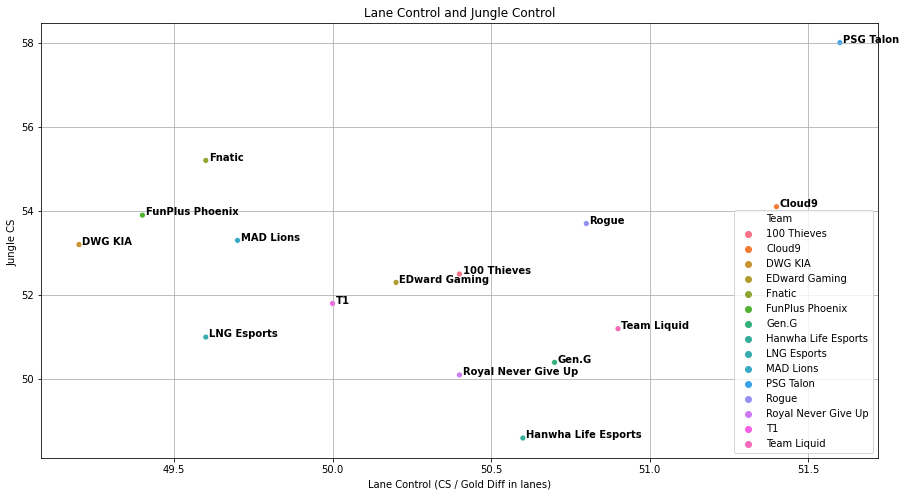

In [28]:
# plt.figure(figsize = (15,8)) 

# g1 = sns.scatterplot(data =all_summer_21, x= all_summer_21['KD'], y= all_summer_21['AGT'], hue = 'Team')

# plt.title('Kills to Death Ratio VS Average Game Duration')
# # Set x-axis label
# plt.xlabel('Kills to Death Ratio')
# # Set y-axis label
# plt.ylabel('Average Game Duration')

# plt.grid()

# for line in range(0,all_summer_21.shape[0]):
#      g1.text(all_summer_21.KD[line]+0.01,all_summer_21.AGT[line], 
#      all_summer_21.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')



# plt.figure(figsize = (15,8)) 
# g2 = sns.scatterplot(data =all_summer_21, x= all_summer_21['TKPM'], y= all_summer_21['AGT'], hue = 'Team')

# plt.title('Team Kills Per Minute VS Average Game Duration')
# # Set x-axis label
# plt.xlabel('Team Kills Per Minute')
# # Set y-axis label
# plt.ylabel('Average Game Duration')
# plt.grid()

# for line in range(0,all_summer_21.shape[0]):
#      g2.text(all_summer_21.TKPM[line]+0.01,all_summer_21.AGT[line], 
#      all_summer_21.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')
        

# plt.figure(figsize = (15,8)) 

# g4 = sns.scatterplot(data =all_summer_21, x= all_summer_21['GPR'], y= all_summer_21['GSPD'], hue = 'Team')

# plt.title('GPR vs GSPD')
# # Set x-axis label
# plt.xlabel('Gold Percent Rating')
# # Set y-axis label
# plt.ylabel('Average gold spent percentage difference')
# plt.grid()

# for line in range(0,all_summer_21.shape[0]):
#      g4.text(all_summer_21.GPR[line]+0.01,all_summer_21.GSPD[line], 
#      all_summer_21.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')


# plt.figure(figsize = (15,8)) 
# g5 = sns.scatterplot(data =all_summer_21, x= all_summer_21['GD15'], y= all_summer_21['WR'], hue = 'Team')

# plt.title('GD15 VS Win Rate')
# # Set x-axis label
# plt.xlabel('Gold Difference / Lead At 15')
# # Set y-axis label
# plt.ylabel('Win Rate')
# plt.grid()

# for line in range(0,all_summer_21.shape[0]):
#      g5.text(all_summer_21.GD15[line]+0.01,all_summer_21.WR[line], 
#      all_summer_21.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')
        

plt.figure(figsize = (15,8)) 
g6 = sns.scatterplot(data =all_summer_21, x= all_summer_21['LNE'], y= all_summer_21['JNG'], hue = 'Team')

plt.title('Lane Control and Jungle Control')
# Set x-axis label
plt.xlabel('Lane Control (CS / Gold Diff in lanes)')
# Set y-axis label
plt.ylabel('Jungle CS ')

plt.grid()

for line in range(0,all_summer_21.shape[0]):
     g6.text(all_summer_21.LNE[line]+0.01,all_summer_21.JNG[line], 
     all_summer_21.Team[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

In [29]:
# all_summer_21.sort_values('TKPM', ascending = False)
#all_summer_21.sort_values('GD15', ascending = False)
all_summer_21.sort_values('EGR', ascending = False)
#all_summer_21.sort_values('FT&F3T', ascending = False)
#all_summer_21.sort_values('DRG', ascending = False)

,Team,league,gameid,WR,AGT,TK,TD,KD,TKPM,GPR,...,F3T,FD,DRG,ELD,FBN,BN,HLD,LNE,JNG,FT&F3T
10,PSG Talon,PCS,18,1.00,28.41,20.11,7.17,2.81,0.74,2.62,...,0.94,0.50,0.70,nan,0.83,0.89,0.61,51.60,58.00,0.86
11,Rogue,LEC,18,0.72,32.22,15.50,10.56,1.47,0.49,1.82,...,0.89,0.61,0.56,0.50,0.50,0.55,0.61,50.80,53.70,0.86
4,Fnatic,LEC,18,0.61,31.82,17.06,14.83,1.15,0.55,1.24,...,0.78,0.67,0.66,0.25,0.67,0.67,0.67,49.60,55.20,0.78
0,100 Thieves,LCS,27,0.67,31.85,13.11,10.22,1.28,0.42,0.96,...,0.74,0.52,0.55,1.00,0.59,0.62,0.59,50.40,52.50,0.72
13,T1,LCK,44,0.57,34.45,11.55,10.30,1.12,0.35,0.74,...,0.73,0.43,0.47,0.83,0.52,0.53,0.41,50.00,51.80,0.66
14,Team Liquid,LCS,27,0.56,34.27,13.33,11.63,1.15,0.40,0.50,...,0.52,0.59,0.50,0.62,0.52,0.55,0.52,50.90,51.20,0.61
1,Cloud9,LCS,27,0.56,32.95,14.85,10.93,1.36,0.46,0.36,...,0.44,0.48,0.56,0.50,0.52,0.60,0.37,51.40,54.10,0.41
9,MAD Lions,LEC,18,0.67,33.47,15.44,14.17,1.09,0.47,0.33,...,0.61,0.56,0.58,0.25,0.67,0.74,0.44,49.70,53.30,0.56
2,DWG KIA,LCK,43,0.67,32.53,14.12,11.81,1.19,0.45,0.39,...,0.63,0.42,0.57,0.17,0.67,0.75,0.67,49.20,53.20,0.63
6,Gen.G,LCK,46,0.59,33.74,13.15,10.65,1.23,0.40,-0.06,...,0.46,0.57,0.59,0.75,0.52,0.54,0.41,50.70,50.40,0.42


## WORLDS 2021 VISUALIZATION

In [30]:
worlds_data_21

,Team,league,group,GP,W,L,AGT,K,D,KD,...,ELD%,FBN,BN,LNE,JNG,WR,TK,TD,TKPM,FT&F3T
0,100 Thieves,LCS,B,6,3,3,34.70,72,77,0.94,...,NaN,50.00,43%,49.50,49.40,0.50,12.00,12.83,0.20,25.00
1,Cloud9,LCS,A,7,3,4,35.50,95,92,1.03,...,NaN,57.00,42%,50.10,50.70,0.43,13.57,13.14,0.23,43.00
2,DetonatioN FocusMe,LJL,B,6,0,6,31.20,45,101,0.45,...,NaN,17.00,40%,48.50,40.00,0.00,7.50,16.83,0.12,25.00
3,DWG KIA,LCK,A,6,6,0,34.30,102,48,2.13,...,100%,83.00,89%,50.40,53.30,1.00,17.00,8.00,0.28,100.00
4,EDward Gaming,LPL,B,6,4,2,30.80,70,54,1.30,...,NaN,33.00,50%,51.40,58.00,0.67,11.67,9.00,0.19,67.00
5,Fnatic,LEC,C,6,1,5,37.70,94,167,0.56,...,NaN,33.00,25%,50.30,49.80,0.17,15.67,27.83,0.26,66.50
6,FunPlus Phoenix,LPL,A,7,2,5,33.40,63,111,0.57,...,NaN,29.00,33%,49.90,48.50,0.29,9.00,15.86,0.15,43.00
7,Gen.G,LCK,D,8,5,3,37.90,122,114,1.07,...,50%,38.00,53%,49.50,48.70,0.62,15.25,14.25,0.25,69.00
8,Hanwha Life Esports,LCK,C,7,4,3,37.60,117,94,1.24,...,NaN,71.00,67%,51.00,50.80,0.57,16.71,13.43,0.28,57.00
9,LNG Esports,LPL,D,7,3,4,31.70,88,74,1.19,...,0%,29.00,29%,50.80,50.50,0.43,12.57,10.57,0.21,43.00


In [31]:
# 1) AVG GAME TIME (X)  CKPM / TKPM             REGION AND TEAMS

# teams = all_summer_19['Team']
# region = all_summer_19['league']


# plt.figure(figsize = (15,8)) 

# g1 = sns.scatterplot(data =worlds_data_21, x= worlds_data_21['KD'], y= worlds_data_21['AGT'], hue = 'Team')

# plt.title('Kills to Death Ratio VS Average Game Duration')
# # Set x-axis label
# plt.xlabel('Kills to Death Ratio')
# # Set y-axis label
# plt.ylabel('Average Game Duration')
# plt.grid()

# for line in range(0,worlds_data_21.shape[0]):
#      g1.text(worlds_data_21.KD[line]+0.01,worlds_data_21.AGT[line], 
#      worlds_data_21.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')



# plt.figure(figsize = (15,8)) 
# g2 = sns.scatterplot(data =worlds_data_21, x= worlds_data_21['FBN'], y= worlds_data_21['WR'], hue = 'Team')

# plt.title('First Baron Rate V.S Win Rate')
# # Set x-axis label
# plt.xlabel('First BAron Rate')
# # Set y-axis label
# plt.ylabel('Win Rate')
# plt.grid()

# for line in range(0,worlds_data_21.shape[0]):
#      g2.text(worlds_data_21.FBN[line]+0.01,worlds_data_21.WR[line], 
#      worlds_data_21.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')
        

# plt.figure(figsize = (15,8)) 

# g4 = sns.scatterplot(data =worlds_data_21, x= worlds_data_21['GPR'], y= worlds_data_21['GSPD'], hue = 'Team')

# plt.title('GPR vs GSPD')
# # Set x-axis label
# plt.xlabel('Gold Percent Rating')
# # Set y-axis label
# plt.ylabel('Average gold spent percentage difference')
# plt.grid()

# for line in range(0,worlds_data_21.shape[0]):
#      g4.text(worlds_data_21.GPR[line]+0.01,worlds_data_21.GSPD[line], 
#      worlds_data_21.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')


# plt.figure(figsize = (15,8)) 
# g5 = sns.scatterplot(data =worlds_data_21, x= worlds_data_21['GD15'], y= worlds_data_21['WR'], hue = 'Team')

# plt.title('GD15 VS Win Rate')
# # Set x-axis label
# plt.xlabel('Gold Difference / Lead At 15')
# # Set y-axis label
# plt.ylabel('Win Rate')
# plt.grid()

# for line in range(0,worlds_data_21.shape[0]):
#      g5.text(worlds_data_21.GD15[line]+0.01,worlds_data_21.WR[line], 
#      worlds_data_21.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')
        

# plt.figure(figsize = (15,8)) 
# g6 = sns.scatterplot(data =worlds_data_21, x= worlds_data_21['LNE'], y= worlds_data_21['JNG'], hue = 'Team')

# plt.title('Lane Control and Jungle Control')
# # Set x-axis label
# plt.xlabel('Lane Control (CS / Gold Diff in lanes)')
# # Set y-axis label
# plt.ylabel('Jungle CS ')

# plt.grid()

# for line in range(0,worlds_data_21.shape[0]):
#      g6.text(worlds_data_21.LNE[line]+0.01,worlds_data_21.JNG[line], 
#      worlds_data_21.Team[line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')

In [32]:
#worlds_data_21.sort_values('BN%', ascending = False)
#worlds_data_21.sort_values('GD15', ascending = False)
#worlds_data_21.sort_values('EGR', ascending = False)
#worlds_data_21.sort_values('FT&F3T', ascending = False)
worlds_data_21.sort_values('HLD', ascending = False)

worlds_data_21 = worlds_data_21[['Team', 'league', 'WR', 'AGT', 'TK','TD','KD', 'CKPM', 'TKPM', 'GPR','GSPD','EGR','MLR','GD15',
                                 'FB', 'FT', 'F3T', 'PPG', 'HLD', 'FD', 'DRG', 'FBN', 'BN', 'LNE','JNG','FT&F3T']]



## Data Visualization Per Region

In [33]:
# worlds_region_data_21 = worlds_data_21.groupby(['Team','league']).agg({'WR': 'mean','AGT': 'mean','TK': 'mean','TD':'mean','KD': 'mean',
#                                                                        'CKPM': 'mean','TKPM': 'mean','GPR': 'mean', 'GSPD': 'mean',
#                                                                        'EGR': 'mean','MLR': 'mean', 'GD15': 'mean','FB': 'mean',
#                                                                        'FT': 'mean','F3T': 'mean','PPG':'mean','HLD': 'mean','FD': 'mean', 'DRG': 'mean',
#                                                                        'FBN': 'mean','BN': 'mean',                                                            
#                                                                        'LNE': 'mean', 'JNG': 'mean',
#                                                                        'FT&F3T': 'mean'})





In [34]:
worlds_data_21.to_csv('worlds_21.csv', index = False)

In [35]:
worlds_data_21

,Team,league,WR,AGT,TK,TD,KD,CKPM,TKPM,GPR,...,F3T,PPG,HLD,FD,DRG,FBN,BN,LNE,JNG,FT&F3T
0,100 Thieves,LCS,0.50,34.70,12.00,12.83,0.94,0.72,0.20,-0.59,...,33.00,4.00,33.00,67.00,54%,50.00,43%,49.50,49.40,25.00
1,Cloud9,LCS,0.43,35.50,13.57,13.14,1.03,0.75,0.23,0.13,...,43.00,5.60,50.00,57.00,53%,57.00,42%,50.10,50.70,43.00
2,DetonatioN FocusMe,LJL,0.00,31.20,7.50,16.83,0.45,0.78,0.12,-2.25,...,17.00,3.20,25.00,33.00,30%,17.00,40%,48.50,40.00,25.00
3,DWG KIA,LCK,1.00,34.30,17.00,8.00,2.13,0.73,0.28,2.42,...,100.00,7.80,58.00,50.00,70%,83.00,89%,50.40,53.30,100.00
4,EDward Gaming,LPL,0.67,30.80,11.67,9.00,1.30,0.67,0.19,0.81,...,67.00,5.20,58.00,50.00,57%,33.00,50%,51.40,58.00,67.00
5,Fnatic,LEC,0.17,37.70,15.67,27.83,0.56,1.15,0.26,-0.96,...,50.00,4.70,50.00,83.00,42%,33.00,25%,50.30,49.80,66.50
6,FunPlus Phoenix,LPL,0.29,33.40,9.00,15.86,0.57,0.74,0.15,-1.34,...,43.00,6.30,57.00,57.00,39%,29.00,33%,49.90,48.50,43.00
7,Gen.G,LCK,0.62,37.90,15.25,14.25,1.07,0.78,0.25,0.57,...,63.00,6.40,56.00,50.00,55%,38.00,53%,49.50,48.70,69.00
8,Hanwha Life Esports,LCK,0.57,37.60,16.71,13.43,1.24,0.80,0.28,1.18,...,71.00,4.40,79.00,57.00,61%,71.00,67%,51.00,50.80,57.00
9,LNG Esports,LPL,0.43,31.70,12.57,10.57,1.19,0.73,0.21,0.05,...,43.00,3.90,15.00,71.00,62%,29.00,29%,50.80,50.50,43.00


In [36]:
# Function which can retrieve live GOLD DIFF, comps, drakes taken, player leads? (ADC > MID > TOP > JNG > SUPP)

In [37]:
# Here we have a List of all the stats definitions to get a bettet grasp of the data we have in our hands. We will only work
# on a hadful of them as detailed after the list. 



# A	Total assists
# AGT	Average game time/duration, in minutes
# APG	Assists per game
# B%	Percentage of games in which the champion was banned (not tied to a specific role)
# BLND%	Blind-pick rate: percentage of games in which this player/champion was picked before their lane opponent (not always available)
# BN%	Baron control rate
# CCPM	Crowd control dealt to champions per minute
# Champion	Champion name
# CKPM	Average combined kills per minute (team kills + opponent kills)
# CS%P15	Average share of team's total CS post-15-minutes
# CSD10	Average creep score difference at 10 minutes
# CSD15	Average creep score difference at 15 minutes
# CSD20	Average creep score difference at 20 minutes
# CSPM	Average monsters + minions killed per minute
# CTR%	Counter-pick rate: percentage of games in which this player/champion was picked after their lane opponent (not always available)
# CWPM	Control wards purchased per minute
# D	Total deaths
# D%P15	Average share of team's damage to champions post-15-minutes
# DMG%	Damage Share: average share of team’s total damage to champions
# DMG%P15	Average share of team's damage to champions post-15-minutes
# DPG	Deaths per game
# DPM	Average damage to champions per minute
# DRG%	Dragon control rate: percent of all Dragons killed that were taken by the team, reflecting only elemental drakes if ELD% is present
# DTH%	Average share of team’s deaths
# EGPM	Average earned gold per minute (excludes starting gold and inherent gold generation)
# EGR	Early-Game Rating
# ELD%	Elder dragon control rate
# Event	Event name
# F3T%	First-to-three-towers rate (percentage of games in which team was the first to 3 tower kills
# FB%	First Blood rate -- for players/champions, percent of games earning a First Blood participation (kill or assist)
# FBN%	First Baron rate
# FBV%	First Blood Victim rate -- percent of games player/champion was killed for First Blood
# FD%	First dragon rate
# FT%	First tower rate
# GD10	Average gold difference at 10 minutes
# GD15	Average gold difference at 15 minutes
# GD20	Average gold difference at 20 minutes
# GOLD%	Gold Share: average share of team’s total gold earned (excludes starting gold and inherent gold generation)
# GP	Games Played
# GPM	Average gold per minute
# GPR	Gold percent rating (average amount of game’s total gold held, relative to 50%)
# GSPD	Average gold spent percentage difference
# GXD10	Average gold+experience difference at 10 minutes
# GXD15	Average gold+experience difference at 15 minutes
# GXD20	Average gold+experience difference at 20 minutes
# HLD%	Rift Herald control rate
# IWC%	Average percentage of opponent’s invisible wards cleared
# JNG%	Jungle Control: average share of game’s total jungle CS
# K	Total kills
# KD	Kill-to-Death Ratio
# KDA	Total Kill/Death/Assist ratio
# KP	Kill participation: percentage of team's kills in which player earned a Kill or Assist
# KPG	Kills per game
# KS%	Kill share: player's percentage of their team's total kills
# L	Losses
# LNE%	Lane Control: average share of game’s total lane CS
# MLR	Mid/Late Rating
# P%	Percentage of games champion was picked in this role.
# P+B%	Percentage of games in which the champion was either banned or picked in any role
# Player	Player's in-game name
# Pos	Position
# PPG	Turret plates destroyed per game
# STL	Neutral objectives stolen
# STLPG	Neutral objectives stolen per game
# StPG	Neutral objectives stolen per game
# Team	Team name
# VSPM	Vision score per minute
# VWC%	Average percentage of opponent’s visible wards cleared
# W	Wins
# W%	Win percentage
# WC%	Average percentage of opponent wards cleared
# WCPM	Average wards cleared per minute
# WPM	Average wards placed per minute
# XPD10	Average experience difference at 10 minutes
# XPD15	Average experience difference at 15 minutes
# XPD20	Average experience difference at 20 minutes
                                    
                                    
                                    

In [38]:
# Additional Parameters Info: 

# EGR: https://oracleselixir.com/blog/post/10689/early-game-rating-2-0
# EGR calculates a team’s probability of winning the game based on the game state at 15:00, 
# and reports that probability as a rating. A team’s EGR across multiple games is the average of their EGR from those games.

## Mid/Late Rating (MLR), take the actual game outcome, compare to the probability at 15 minutes,
#and then average the differences across multiple games. In other words, the MLR is a +/- that shows a team’s actual win rate
#compared to the win rate we would expect to see based on their early-game performance.

# WIN PROBABILITY : https://oracleselixir.com/blog/post/10500/what-are-the-odds-modeling-win-probability-in-league-of-legends
# Stadistical information https://oracleselixir.com/blog/post/13483/significant-statistics-a-basic-guide-to-informing-your-opinions-with-oracles-elixir
# Advanced Stadistics : https://oracleselixir.com/blog/post/10286/lols-advanced-stats-problem-cody-gerard


###### MACHINE LEARNING LOL

# https://www.samford.edu/sports-analytics/fans/2020/Esports-Win-Probability-A-Role-Specific-Look-into-League-of-Legends
# https://www.masterbigdata.pro/analizamos-league-of-legends-usando-machine-learning/
# https://www.mobachampion.com/predict/
# https://towardsdatascience.com/match-prediction-in-league-of-legends-using-vanilla-deep-neural-network-7cadc6fce7dd


# https://rpubs.com/diegolas/LogisticLoL
# https://slundberg.github.io/shap/notebooks/League%20of%20Legends%20Win%20Prediction%20with%20XGBoost.html




In [39]:
# We now set some colors to highlight certain stadistics and apply the proper format to our data: 

# def color_negative_red(value):
#     """
#     Colors elements from a dataframe, red for negative
#     values, green for positive. (Nan Values default)
#     """
#     if value < 0:
#         color = 'red'
#     elif value > 0:
#         color = 'green'    
#     else:
#         color = 'black'
#     return 'color: %s' % color


# def highlight_top8(s):
#      is_large = s.nlargest(8).values
#      return ['color: blue' if v in is_large else 'red' for v in s]


#s = summer_19.style.applymap(highlight_top8, subset=[['AGT', 'TK', 'TD', 'TKPM', 'CKPM','FB','FT', 'F3T','FD','DRG',
#                                                     'ELD','FBN','BN','HLD','KD','GD15'])
# s = s.format("{:.0f}")

#s = s.format({'AGT': "{:.2f}", 'TK': "{:.2f}", 'TD': "{:.2f}",'TKPM': "{:.2f}", 'CKPM': "{:.2f}", 'FB': "{:.0%}",'FT': "{:.0%}", 'F3T': "{:.0%}", 'FD': "{:.0%}", 'DRG': "{:.0%}",'ELD': "{:.0%}", 'FBN': "{:.0%}",'BN': "{:.0%}", 'HLD': "{:.0%}", 'KD': "{:.2f}", 'GD15': "{:.2f}"})



                         
                     
                         

